### Importing main libraries

In [53]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as dt

# Question 1: Finding the IMDB-WIKI Dataset

This dataset can be found [here](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/). However, this notebook only works with its [metadata](https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_meta.tar)

In [56]:
data = loadmat("Datasets\imdb\imdb.mat") # loading the database metadata

In [3]:
data # displaying the raw dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan 17 11:30:27 2016',
 '__version__': '1.0',
 '__globals__': [],
 'imdb': array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]]), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
         array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
         array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
         ...,
         array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
         array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
         array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
       dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
         array(['Fred Astaire'], dtype='<U12'),
         array(['Fred Astaire'], dtype='<U12'), ...,
         a

# Reading our dataset 

As this dataset is in a `.mat` format, it's required to convert it into a format Python can understand

## Obtaining an identifier of each observation

In [4]:
identifier = data['imdb']
id_type = identifier.dtype

## Turning the dataset into a Panda's dataframe

In [5]:
ndata = {n: identifier[n][0, 0] for n in id_type.names} # creating a dictionary with the dataset information in original format
new_ndata = {} # dictionary for storing the column values as an array per column

for key, value in ndata.items():
    new_ndata[key] = value[0] # assign to each column key its respective values

new_ndata.pop('celeb_names', None) # erasing column as it's the only case with a different number of observations than the rest
df = pd.DataFrame(new_ndata)

In [6]:
df # displaying the dataframe

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id
0,693726,1968,[01/nm0000001_rm124825600_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1072.926, 161.838, 1214.7839999999999, 303.6...",1.459693,1.118973,6488
1,693726,1970,[01/nm0000001_rm3343756032_1899-5-10_1970.jpg],1.0,[Fred Astaire],"[[477.184, 100.352, 622.592, 245.76]]",2.543198,1.852008,6488
2,693726,1968,[01/nm0000001_rm577153792_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[114.96964308962852, 114.96964308962852, 451....",3.455579,2.985660,6488
3,693726,1968,[01/nm0000001_rm946909184_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[622.8855056426588, 424.21750383700805, 844.3...",1.872117,NaN,6488
4,693726,1968,[01/nm0000001_rm980463616_1899-5-10_1968.jpg],1.0,[Fred Astaire],"[[1013.8590023603723, 233.8820422075853, 1201....",1.158766,NaN,6488
...,...,...,...,...,...,...,...,...,...
460718,726831,2011,[08/nm3994408_rm761245696_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[453.8981431333457, 77.96623712908011, 539.79...",3.845884,NaN,8410
460719,726831,2011,[08/nm3994408_rm784182528_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[1, 1, 426, 640]]",-inf,NaN,8410
460720,726831,2011,[08/nm3994408_rm926592512_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[1, 1, 453, 640]]",-inf,NaN,8410
460721,726831,2011,[08/nm3994408_rm943369728_1989-12-29_2011.jpg],0.0,[Jane Levy],"[[144.75225471724875, 126.76472287759263, 305....",4.450725,NaN,8410


# Question 2: Plotting the Age Distribution and Bucket of 15 to 25 years old

## Plotting the Age Distribution

First, we create a dataset with only our variables of interest

In [7]:
age_gender_df = df[['dob', 'photo_taken', 'gender', 'celeb_id']]

Second, we obtain the date of birth converting `dob` into a format python understands

In [75]:
age_gender_df['birth'] = age_gender_df['dob'].apply(lambda matlab_datenum: dt.datetime.fromordinal(matlab_datenum) + dt.timedelta(days=matlab_datenum%1))
age_gender_df['birth'] = pd.to_datetime(age_gender_df['birth'], errors = 'coerce') # replacing out of bounds values with NaT
age_gender_df['birth'] = age_gender_df['birth'] - dt.timedelta(days=366)
age_gender_df                                   

D:\Anaconda5.2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda5.2.0\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda5.2.0\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,dob,photo_taken,gender,celeb_id,birth,date_of_pic,age
0,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
1,693726,1970,1.0,6488,1899-05-10,1970-07-01,70.2
2,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
3,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
4,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
...,...,...,...,...,...,...,...
460718,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5
460719,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5
460720,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5
460721,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5


After that, we use the assumption the photo was taken in the middle of the year indicated by `photo_taken`, which was suggested by the crawlers of the IMDB-WIKI dataset

In [76]:
age_gender_df["date_of_pic"] = age_gender_df["photo_taken"].apply(lambda row: dt.datetime.strptime("1-7-"+str(row), '%d-%m-%Y'))
age_gender_df

D:\Anaconda5.2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dob,photo_taken,gender,celeb_id,birth,date_of_pic,age
0,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
1,693726,1970,1.0,6488,1899-05-10,1970-07-01,70.2
2,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
3,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
4,693726,1968,1.0,6488,1899-05-10,1968-07-01,68.2
...,...,...,...,...,...,...,...
460718,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5
460719,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5
460720,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5
460721,726831,2011,0.0,8410,1989-12-29,2011-07-01,20.5


We obtain the age by calculating the difference between the date of the picture (`date_of_pic`) and the birthdate of each observation (`birth`) and expressing it in years (rounded to the first decimal)

In [97]:
age_gender_df['age'] = round((age_gender_df['date_of_pic'] - age_gender_df['birth']) / dt.timedelta(days=365))
age_gender_df

D:\Anaconda5.2.0\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dob,photo_taken,gender,celeb_id,birth,date_of_pic,age
0,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.0
1,693726,1970,1.0,6488,1899-05-10,1970-07-01,71.0
2,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.0
3,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.0
4,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.0
...,...,...,...,...,...,...,...
460718,726831,2011,0.0,8410,1989-12-29,2011-07-01,22.0
460719,726831,2011,0.0,8410,1989-12-29,2011-07-01,22.0
460720,726831,2011,0.0,8410,1989-12-29,2011-07-01,22.0
460721,726831,2011,0.0,8410,1989-12-29,2011-07-01,22.0


To plot our age distribution, invalid values will be discarded. If one of the two following criteria is met, the observation will be considered invalid:

1. Age lower than 0
1. Age greater than 122 (according to a [Nature article](https://www.nature.com/articles/nature19793#:~:text=Maximum%20lifespan%20is%2C%20in%20contrast,individual%20who%20ever%20lived4.), this is the maximum reported age at death)

In [87]:
age_gender_df_valid = age_gender_df[(age_gender_df['age']>0) & (age_gender_df['age']<=122)]
age_gender_df_valid

,dob,photo_taken,gender,celeb_id,birth,date_of_pic,age
0,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.2
1,693726,1970,1.0,6488,1899-05-10,1970-07-01,71.2
2,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.2
3,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.2
4,693726,1968,1.0,6488,1899-05-10,1968-07-01,69.2
...,...,...,...,...,...,...,...
460718,726831,2011,0.0,8410,1989-12-29,2011-07-01,21.5
460719,726831,2011,0.0,8410,1989-12-29,2011-07-01,21.5
460720,726831,2011,0.0,8410,1989-12-29,2011-07-01,21.5
460721,726831,2011,0.0,8410,1989-12-29,2011-07-01,21.5


Finally, we can plot our distribution. However, it should be noted that there are images of the same person in the database, but, as their age at the moment their pictures were taken can vary, these cases are considered different members of the population

<IPython.core.display.Javascript object>


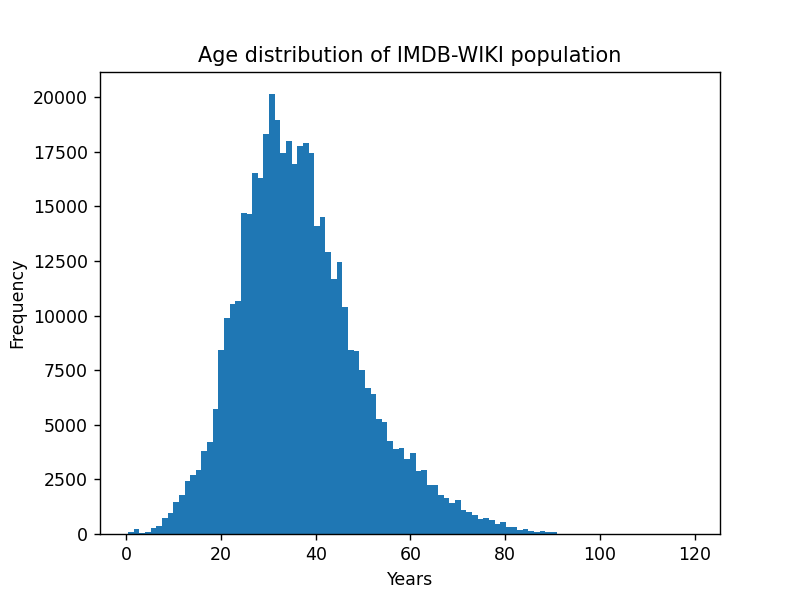

Text(0, 0.5, 'Frequency')

In [92]:
plt.hist(age_gender_df_valid['age'], bins=100)
plt.title(label="Age distribution of IMDB-WIKI population")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Frequency")

## Population between 15 to 25 years old

We can do this calculation by counting the number of observations whose age falls under this range

In [93]:
len(age_gender_df_valid[(age_gender_df_valid['age']>=15) & (age_gender_df_valid['age']<=25)].index)

66528

# Question 3: % of 30 year old males

An observation is male if gender equals 1 and female if gender equals 0

In [96]:
males_of_30 = len(age_gender_df_valid[(age_gender_df_valid['age']==30) & (age_gender_df_valid['gender']==1)].index)
total_population = len(age_gender_df_valid)
answer_q3 = round((males_of_30/total_population)*100, 2)
print(f"The percentage of 30 year old males is {answer_q3}%")

The percentage of 30 year old males is 0.15%


# Question 4: Building an algorithm to predict a person's age using their face

As the algorithm would be used for facial recognition, these are the steps I would follow:

1. Gather some data containing only people faces and their ages
1. Choose some success measure, like precision or accuracy
1. Clean the data
1. Normalize it if necessary
1. Split it into training and testing datasets
1. Select a machine learning model for the task
1. Train the model until it has the desired value for the chosen success meassure
1. Test it with the validation data

There are several algorithms that could be used for this task. Personally, I strongly prefer Convolutional Neural Networks (CNN) for their exceptional image recognition ability 

# Question 5: Tradeoffs of the selected algorithm

## Main tradeoffs

1. There is a tradeoff between awareness of an object orientation and the precision of the algorithm. A CNN doesn't take into account the orientation and position of the components in an image, so we have avoid images with components in strange positions to have good predictions. For example, if there is some image in our database in which a two eyes, two ears and a mouth appear in random positions, the algorithm would recognize that as a face. This is a severe drawback, as the presence of those elements doesn't mean the image is of a face. It should also consider their position and orientation to do a more accurate prediction.

2. A CNN isn't aware of a 3 dimensional space. As a result, it requires a great number of data in order to provide good predictions of an object in different angles. For example, suppose you have a dataset with pictures of fruits, where some of them were taken in different angles. If the dataset is small, the algorithm would consider the picture of an apple taken in a weird angle as an object different from a fruit.

## Selected loss function

In this case, the sparse categorial crossentropy loss function was selected as predicting the age is a multiclasss classification (each class is an age) and each class is mutually exclusive (if a person has 18 years old, it can't have 21 at the same time).

# Question 6: Would you trust this algorithm in high stake situations?

I would not trust it if there isn't a great number of observations to train the model, because its lack of spatial (3d) awareness when recognizing an image may result in unreliable predictions for risky scenarios. 

Lets consider the case where the algorithm is used to detect minors at an airport. For this scenario, it will require the images registered by the airport cameras to identify them. However, they will have registered them in different angles. As a result, there would be cases in which the algorithm won't recognise the pictures of children if these were taken in a particular angle the model wasn't trained to evaluate. If we imagine a situation where a child gets lost in the airport and its parents want to find him using this algorithm, it's likely that it will ignore some of the child pictures if they were taken in angles unknown for the model, endangering the boy/girl's life.

# Question 7: Algorithm Flowchart

![](img\CNN_algorithm_flowchart.png)

### Legend:

1. In this case, Tensorflow could be used for implementing the CNN, especifically the Keras API
1. As the algorithm will obtain the features it requires from the images and the age is the target variable, we only need to keep the path to the images and the age in this step
1. Normalizing the scale of the images (rescaling its pixel values to be between 0 and 1) is usually required for having better predictions. However, there are cases in which the data is already normalized, so checking this becomes necessary
1. In order to train and validate our model, we require to split our data into a training and testing dataset.
1. We have to choose which model we want to instantiate. If Keras is being used, this implies choosing between a Sequential (linear stack of layers) and a Functional (arbitrary graph of layers) model. In this case, the Sequential will be used because its the simplest one
1. We will add 3 layers.
    1. A layer to specify the input shape, (i.e. Conv2D)
    1. Another layer to pool the data (i.e. MaxPooling2D)
    1. A final layer to give the model the ability to make predictions (i.e. softmax)
1. A method of optimization to find the best parameters for the model has to be defined. For instance, we could use Adam, a gradient-based one. In addition, a loss function has to be specified, like the sparse categorical crossentropy, which is used for multiclass classification of mutually exclusive classes.
1. Train the model using the training data
1. After the multilayer model is trained, the previous value of its weight matrix will be updated
1. We will make our model work through the training data an specific number of times (= max number of epochs)
1. Finally, we can start making predictions with our updated model


### Training the CNN

Fitting the model only requires inputting the training dataset (images and ages), the number of epochs and the batch size to the Keras `fit` command

### Testing the CNN

The model can be evaluated using the command `evaluate`, which uses our fitted model in the testing dataset